In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
df=pd.read_csv("melb_data.csv")
df.head()
import warnings
warnings.filterwarnings("ignore")

In [165]:
df=df.fillna(method="ffill")

In [166]:
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     1
YearBuilt        1
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [167]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13579 non-null  float64
 15  YearBuilt      13579 non-null  float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

(None,
               Rooms         Price      Distance      Postcode      Bedroom2  \
 count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
 mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
 std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
 min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
 25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
 50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
 75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
 max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   
 
            Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
 count  13580.000000  13580.000000   13580.000000  13579.000000  13579.000000   
 mean       1.534242      1.609573     558.416127    150.035168   1964.625967   
 std        0.691712      0.

In [168]:
df['Method'].unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

Text(0, 0.5, 'Price')

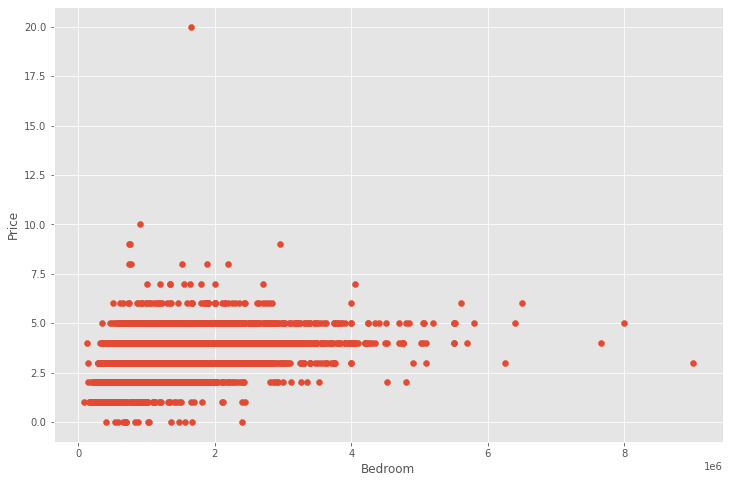

In [169]:
#Visualizing relationships
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(df['Price'], df['Bedroom2'])

plt.xlabel('Bedroom')
plt.ylabel('Price')

<AxesSubplot:>

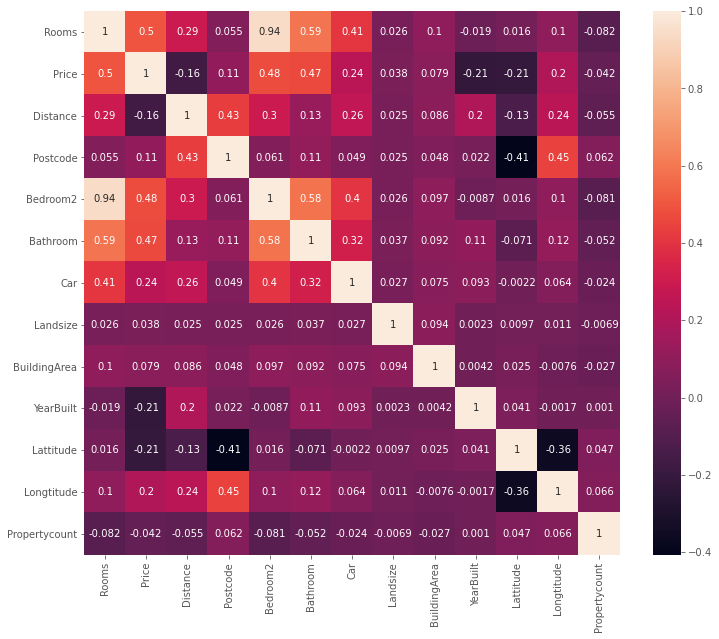

In [170]:
df2=df.corr()
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(df2, annot=True)

In [171]:
y= df.Price                  

In [172]:
df_features = ['Rooms','Distance','Bathroom','Landsize','Lattitude','Longtitude']
x=df[df_features]
x.describe()
x.isna().sum()

Rooms         0
Distance      0
Bathroom      0
Landsize      0
Lattitude     0
Longtitude    0
dtype: int64

In [173]:
#MULTIPLE linear regression model
from sklearn.linear_model import LinearRegression

#initiate linear regression model
model = LinearRegression()
#fit regression model
model.fit(x, y)
print(model.intercept_, model.coef_, model.score(x, y))


-197962798.554791 [ 3.22751708e+05 -4.28599320e+04  1.82443951e+05  4.47752125e+00
 -1.64418475e+06  9.38493140e+05] 0.47128257420567043


In [174]:
import statsmodels.api as sm
#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())
#create Q-Q plot

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     2016.
Date:                Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:03:52   Log-Likelihood:            -1.9648e+05
No. Observations:               13580   AIC:                         3.930e+05
Df Residuals:                   13573   BIC:                         3.930e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.98e+08   5.76e+06    -34.378      0.0

In [175]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import preprocessing, svm
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.2)
train_X.shape, test_X.shape, train_y.shape

((10864, 7), (2716, 7), (10864,))

In [176]:
# LINEAR REGRESSION ALGORITHM
mdl3=LinearRegression(normalize=True, fit_intercept=False).fit(train_X,train_y)
print("Training_score : " , mdl3.score(train_X,train_y))
#print(accuracy)
predictors = train_X.columns
predictors


Training_score :  0.4670485649299406


Index(['const', 'Rooms', 'Distance', 'Bathroom', 'Landsize', 'Lattitude',
       'Longtitude'],
      dtype='object')

In [177]:
coef = pd.Series(mdl3.coef_, predictors).sort_values()

print(coef)

const        -1.962497e+08
Lattitude    -1.598732e+06
Distance     -4.202429e+04
Landsize      4.382372e+00
Bathroom      1.780515e+05
Rooms         3.233018e+05
Longtitude    9.385014e+05
dtype: float64


In [178]:
y_pred = mdl3.predict(test_X)
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': test_y})
df_pred_actual.head(5)

,predicted,actual
12322,1.039378e+06,835000.0
11816,9.504503e+05,615000.0
303,1.042577e+06,910000.0
12892,1.105485e+06,1726000.0
9885,1.308847e+06,715000.0


In [179]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(test_y, y_pred))

Testing_score :  0.4869517213095811


In [180]:
df_sample100= df_pred_actual.sample(100).reset_index()
df_sample100

,index,predicted,actual
0,12371,1.829884e+06,1700000.0
1,8737,2.350414e+06,2000000.0
2,13268,9.909165e+05,1150000.0
3,8738,1.181173e+06,1365000.0
4,9918,9.515149e+05,1682000.0
...,...,...,...
95,12307,1.001389e+06,1905000.0
96,7226,1.431981e+06,837000.0
97,13385,1.147803e+06,1340000.0
98,10160,1.273710e+06,1405000.0


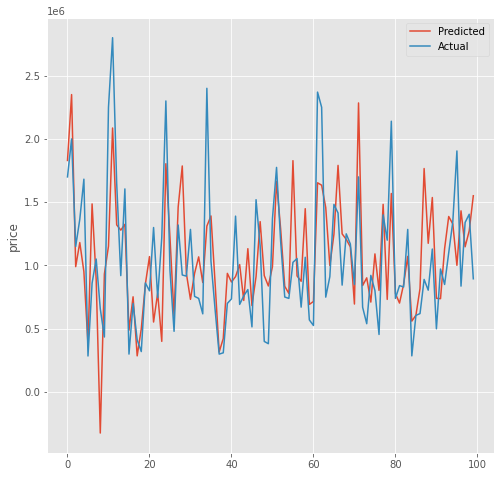

In [181]:
plt.figure(figsize = (8,8))

plt.plot(df_sample100['predicted'], label='Predicted')
plt.plot(df_sample100['actual'], label='Actual')

plt.ylabel('price')

plt.legend()
plt.show()

In [182]:
# to save time in tain dataset when data set is very huge
import pickle
train_X, val_X, train_y, val_y = train_test_split(x, y, test_size = 0.2)
mdl3=LinearRegression(n_jobs= 1)
mdl3.fit(train_X,train_y)
with open ('linearregression.pickle','wb') as f:
    pickle.dump(mdl3,f)

pickl_in = open('linearregression.pickle','rb')
mdl3= pickle.load(pickl_in)
accuracy = mdl3.score(val_X,val_y)
#print(accuracy)
forecast = mdl3.predict(x)
print(forecast, accuracy)



[ 988466.99124163  996975.14219508 1504197.46412456 ... 1288944.56456286
 1445877.03656441 1380659.68926534] 0.476918127733833


# regression one var (distance)

In [183]:
X = df[['Distance']]
Y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.0260032033900921
Testing score:  0.027723973848541528


In [184]:
df_pred_actual = pd.DataFrame({'predicted price': y_pred, 'actual price': test_y})
df_pred_actual.head(5)

,predicted price,actual price
12322,1.010927e+06,835000.0
11816,1.068666e+06,615000.0
303,1.103659e+06,910000.0
12892,9.129475e+05,1726000.0
9885,1.059917e+06,715000.0


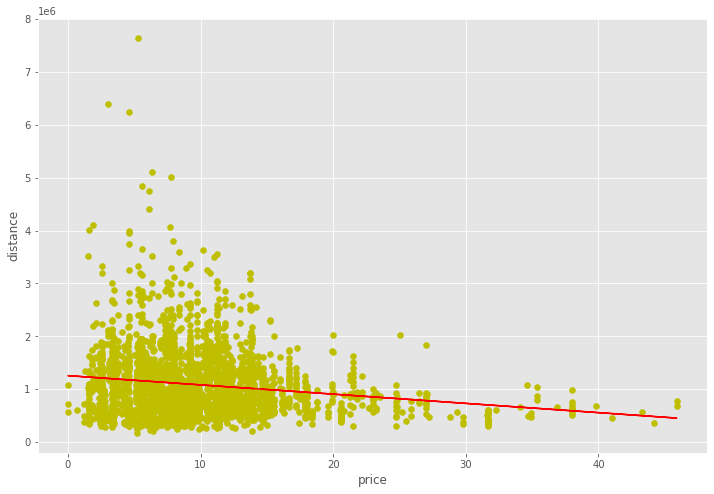

In [185]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test, color = 'y')
plt.plot(x_test, y_pred, color='r')

plt.xlabel('price')
plt.ylabel('distance')
plt.show()

# SimpleRegression_CategoricalValues_ExamScores

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13579 non-null  float64
 15  YearBuilt      13579 non-null  float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [187]:
df['Type'].unique()

array(['h', 'u', 't'], dtype=object)

In [188]:
Type = ['h', 'u', 't']
label_encoding = preprocessing.LabelEncoder()

label_encoding = label_encoding.fit(Type)
df['Type'] = label_encoding.transform(df['Type'].astype(str))
df['Type'].unique()

array([0, 2, 1])

In [189]:
df['Type'].sample(10)

5794     2
3708     0
4601     0
9476     0
9896     0
807      0
2613     0
11696    0
12053    0
10517    0
Name: Type, dtype: int32

In [190]:
label_encoding.classes_

array(['h', 't', 'u'], dtype='<U1')

In [191]:
df['Method'].unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

In [192]:
df = pd.get_dummies(df, columns=['Method'])

df.head()

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Distance,Postcode,Bedroom2,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
0,Abbotsford,85 Turner St,2,0,1480000.0,Biggin,3/12/2016,2.5,3067.0,2.0,...,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,0,1,0,0,0
1,Abbotsford,25 Bloomburg St,2,0,1035000.0,Biggin,4/02/2016,2.5,3067.0,2.0,...,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,0,1,0,0,0
2,Abbotsford,5 Charles St,3,0,1465000.0,Biggin,4/03/2017,2.5,3067.0,3.0,...,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,0,0,0,1,0
3,Abbotsford,40 Federation La,3,0,850000.0,Biggin,4/03/2017,2.5,3067.0,3.0,...,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,1,0,0,0,0
4,Abbotsford,55a Park St,4,0,1600000.0,Nelson,4/06/2016,2.5,3067.0,3.0,...,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,0,0,0,0,1


#  2 category variable regression ( x= method and type)

In [193]:
X = df[['Type', 'Method_PI','Method_S','Method_SA','Method_SP','Method_VB']]
Y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.18373693805499702
Testing score:  0.18148322769108904


# multiple regression 

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


In [225]:
result_dict = {}
def build_model(regression_fn,                
                name_of_y_col, 
                names_of_x_cols, 
                dataset, 
                test_frac=0.2,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    if preprocess_fn is not None:
        X = preprocess_fn(X)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Training_score : " , model.score(x_train, y_train))
    print("Test_score : ", r2_score(y_test, y_pred))

    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        
        plt.ylabel(name_of_y_col)

        plt.legend()
        plt.show()

    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        
        plt.legend(['Predicted line','Observed data'])
        plt.show()
    
    return {
            'training_score': model.score(x_train, y_train),
            'test_score': r2_score(y_test, y_pred)
           }     

In [226]:
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training score', result_dict[key]['training_score'])
        print('Test score', result_dict[key]['test_score'])
        print()

In [227]:
def linear_reg(x_train, y_train):
    model = LinearRegression(normalize=True)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.22699074947606535
Test_score :  0.22313326885837692


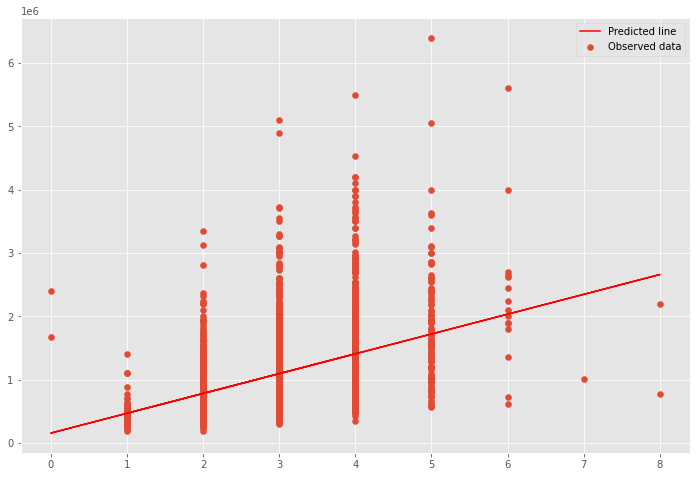

In [244]:
result_dict['price ~ type- linear_reg'] = build_model(linear_reg,
                                                 'Price',
                                                ['Bedroom2'],
                                                  df,
                                                  show_plot_scatter=True)

Training_score :  0.171985519953874
Test_score :  0.17109109200471673


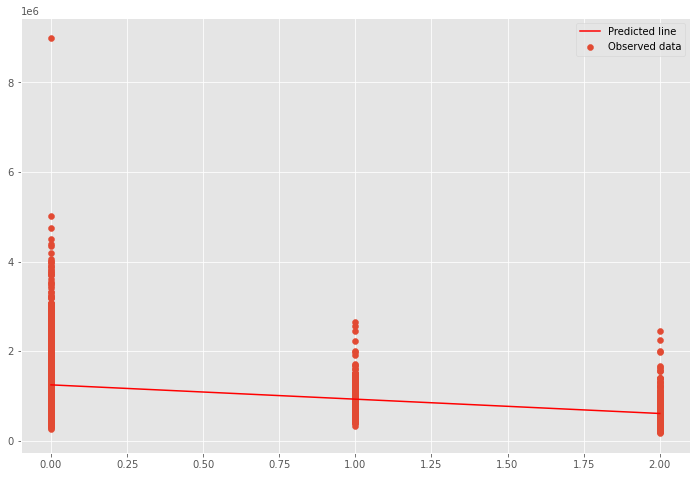

In [245]:
result_dict['price ~ type'] = build_model(linear_reg,
                                                 'Price',
                                                ['Type'],
                                                  df,
                                                  show_plot_scatter=True)

In [246]:
compare_results()

Regression:  price ~ type
Training score 0.171985519953874
Test score 0.17109109200471673

Regression:  price ~ bedroom
Training score 0.15424922122380302
Test score 0.1481727620045673

Regression:  price ~ type- linear_reg
Training score 0.22699074947606535
Test score 0.22313326885837692



In [231]:
def lasso_reg(x_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.1742524215483362
Test_score :  0.16329931705359513


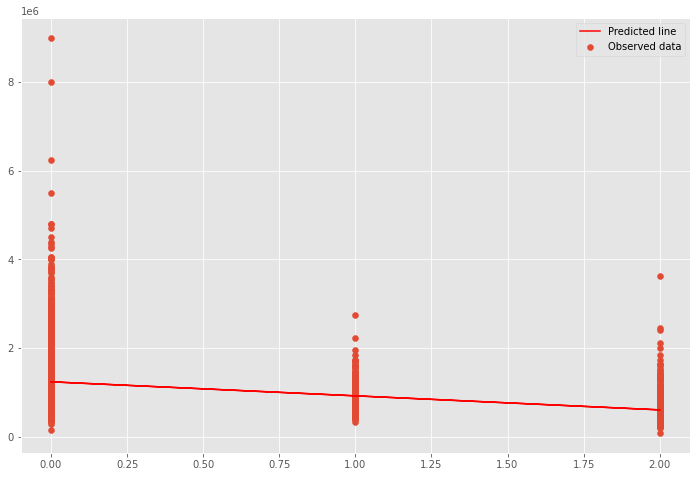

In [232]:
result_dict['price ~ bedroom'] = build_model(lasso_reg,
                                                     'Price',
                                                ['Type'],
                                                    df,
                                                      show_plot_scatter=True)

In [233]:
def ridge_reg(x_train, y_train, alpha=0.5, normalize=True):
    model = Ridge(alpha=alpha, normalize=normalize)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.15424922122380302
Test_score :  0.1481727620045673


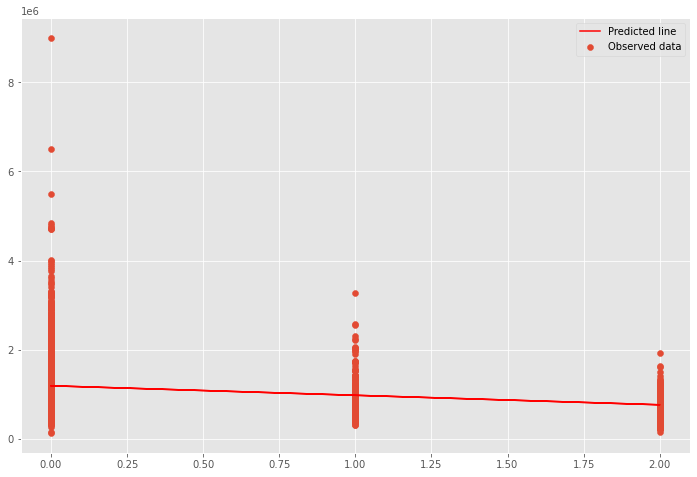

In [234]:
result_dict['price ~ bedroom'] = build_model(ridge_reg,
                                                      'Price',
                                                ['Type'],
                                                    df,
                                                      show_plot_scatter=True)

In [235]:
def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5, 
                    normalize=False, max_iter=100000, warm_start=True, equivalent_to="Elastic Net"):

    print("Equivalent to:", equivalent_to)
    
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, 
                       normalize=normalize, max_iter=max_iter, warm_start=warm_start)
    model.fit(x_train, y_train)

    return model

Equivalent to: OLS
Training_score :  0.17497815461574218
Test_score :  0.1599122573578633


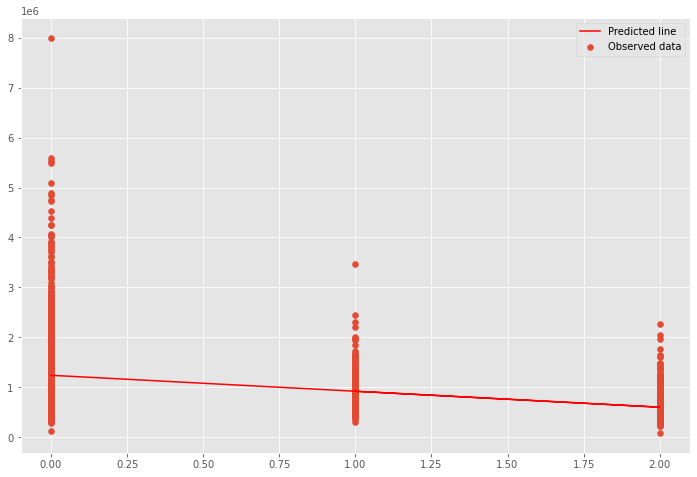

In [236]:
from functools import partial

## This generates a warning which says will not converge
result_dict['price ~ type'] = build_model(partial(elastic_net_reg, 
                                                                        alpha=0, equivalent_to="OLS"),
                                                               'Price',
                                                ['Type'],
                                                    df,
                                                      show_plot_scatter=True)

In [237]:
def svr_reg(x_train, y_train, kernel='linear', epsilon=0.05, C=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=C)
    model.fit(x_train,y_train)
    
    return model

Training_score :  -0.07053004729129664
Test_score :  -0.07080769178429303


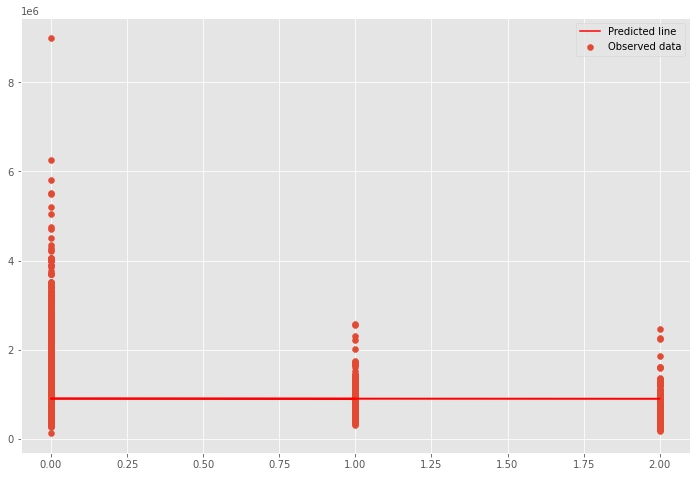

In [238]:
result_dict['price ~ type'] = build_model(svr_reg,
                                                    'Price',
                                                ['Type'],
                                                    df,
                                                      show_plot_scatter=True)

In [239]:
compare_results()

Regression:  price ~ type
Training score -0.07053004729129664
Test score -0.07080769178429303

Regression:  price ~ bedroom
Training score 0.15424922122380302
Test score 0.1481727620045673



In [240]:
def kneighbors_reg(x_train, y_train, n_neighbors=10):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.1733837805290508
Test_score :  0.15674682418130126


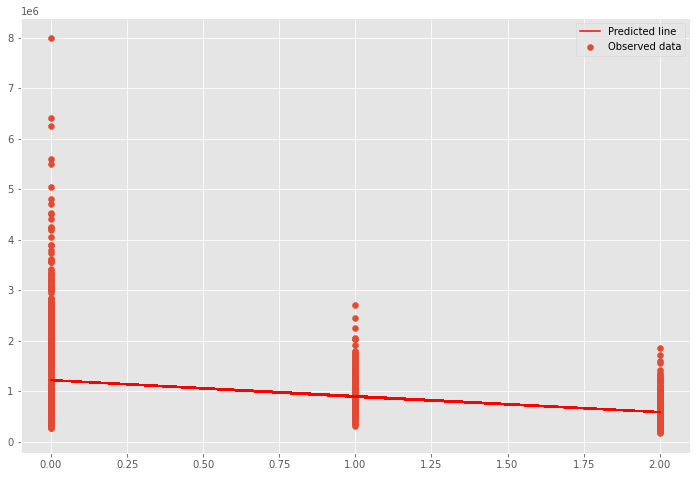

In [241]:
result_dict['price ~ type'] = build_model(kneighbors_reg,
                                                           'Price',
                                                ['Type'],
                                                    df,
                                                      show_plot_scatter=True)

In [242]:
def decision_tree_reg(x_train, y_train, max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.17412593213839123
Test_score :  0.16256690805942486


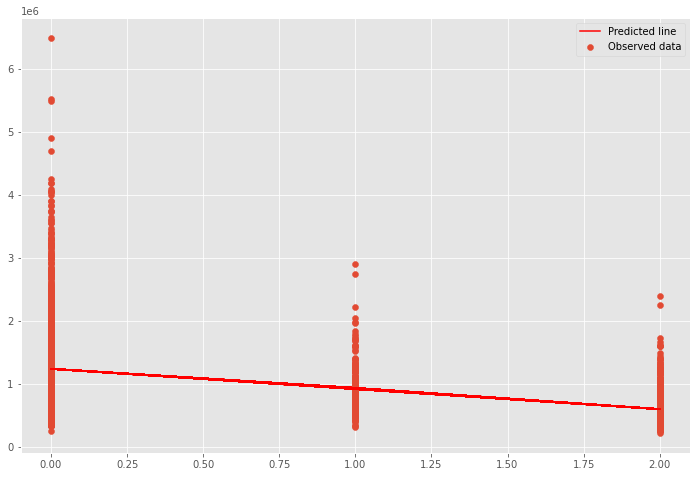

In [243]:
result_dict['price ~ type'] = build_model(decision_tree_reg,
                                                           'Price',
                                                ['Type'],
                                                    df,
                                                      show_plot_scatter=True)